In [293]:
import pandas as pd
import os
import gensim.downloader as api
import nltk
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.neural_network import MLPClassifier
nltk.download("stopwords")

[nltk_data] Downloading package stopwords to C:\Users\Teja
[nltk_data]     Nikhil\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

### Reading the Data

In [294]:
Directory = r"D:\Sem-6\21AIE312 - DL\Project Data\DL-Dataset\CSV files"
data_dir = os.listdir(Directory)

In [295]:
data_dir

['19CSE305_2022_Quiz-2 (2000.19CSE305.B)(1-57).csv',
 '19CSE305_2022_Quiz-2 (2000.19CSE305.C)(1-59).csv',
 '21DS602_2022-23_Quiz-2 (21DS602-Machine Learning)(1-30).csv',
 '21DS602_2022-23_Quiz1 (21DS602-Machine Learning)(1-33).csv',
 '21DS602_2022-23_Quiz3(1-34).csv',
 'BA Quiz 1 (19CSE352-Business Analytics)(1-73).csv',
 'Business Analytics Quiz-2 (19CSE352-Business Analytics)(1-72).csv',
 'Class Quiz 1 (July 29, 2021) (19CSE305-Machine Learning)(1-127).csv',
 'ML (21DS602_21DS644) Quiz 1 (Machine Learning - 21CS644_21DS602)(1-56).csv',
 'ML Quiz (Machine Learning - 21CS644_21DS602)(1-56).csv',
 'Quiz 1 (2000.19CSE305.A)(1-66) (1).csv',
 'Quiz 1 (2000.19CSE305.C)(1-68) (1).csv',
 'Quiz 1(1-64) (1).csv',
 'Quiz 3 - 20211012 (19CSE305-Machine Learning)(1-139).csv']

In [296]:
import numpy as np
np.ceil(1.6)

2.0

In [297]:
def read_processed_csv(file_directory):
    df = pd.read_csv(file_directory)
    cols = df.columns
    for i in range(0,len(cols),2):
#         print(cols[i+1])
        df[cols[i+1]] = df[cols[i+1]].astype("float")
        df[cols[i+1]]=[int(np.ceil(j)) for j in list(df[cols[i+1]])]
    df = df.dropna()
    return df

In [298]:
def Data_Count(points_list):
    points = set(points_list)
    counts = [points_list.count(i) for i in points]
    return counts

In [299]:
# Data_Count()

In [300]:
Questions = []
QA = dict()
data_count = []
for i in data_dir:
#   print(i)
    data_path = os.path.join(Directory, i)
    csv_read = read_processed_csv(data_path)
    cols = csv_read.columns
#   print(cols)
    for j in range(0,len(cols),2):
        Questions.append(cols[j])
        Answer_grades = dict()
        answers = list(csv_read[cols[j]])
        points = list(csv_read[cols[j+1]])
        data_count.append(Data_Count(points))
        for (k,l) in zip(answers, points):
            Answer_grades[k] = l
        QA[cols[j]] = Answer_grades

In [301]:
zero_count = 0
ones_count = 0
twos_count = 0
for i in data_count:
    zero_count = zero_count + i[0]
    ones_count = ones_count + i[1]
    if len(i)==3:
        twos_count = twos_count + i[2]

In [302]:
zero_count

708

In [303]:
ones_count

1086

In [304]:
twos_count

77

In [305]:
num_questions = len(Questions)
num_questions

27

In [306]:
## Data count is a list of count of different grades with their indices indicating the grade
len(data_count)

27

In [307]:
QA

{'Name 2 approaches used for solving multi-class classification problem with SVM.\xa0': {'Stochastic Gradient Descent, gradient': 0,
  'linear approach, sqwigy approach,polynomial function, kernel function, sigmoid function': 0,
  '1.  Gradient Descent 2. Tabu method': 0,
  'the two approaches are 1. One versus One approach 2. One versus remaining approach': 1,
  'One to One approach(n(n-1)/2), one to all approach(n)': 1,
  'one against another, one against all': 1,
  'One class with another class (no. of models=n(n-1)/2), one against all classes (no. of models=n) [n=no.of classes]': 1,
  '1 vs 1 and 1 vs 2': 1,
  'One vs One and one vs all': 1,
  'gradient decent is one of the approach , back propogation': 0,
  'one vs one, one vs many': 1,
  'one vs one approach and one vs all approach.': 1,
  'one to many comparison where one class is taken and it is compared with the other classes in the dataset. The other way of solving the multi classification is by one to one where we compare ea

### Train the model with answers as input and grades as output

In [308]:
answers = []
grades = []
for i in QA.values():
    temp1 = list(i.keys())
    temp2 = list(i.values())
    for (j,k) in zip(temp1,temp2):
        answers.append(remove_stop_words(j))
        grades.append(k)

In [309]:
data_count

[[31, 25],
 [20, 36],
 [24, 35],
 [29, 30],
 [25, 3, 2],
 [3, 2, 25],
 [16, 17],
 [20, 13],
 [15, 19],
 [17, 17],
 [3, 70],
 [48, 25],
 [43, 4, 23],
 [35, 35],
 [43, 27],
 [21, 105],
 [23, 103],
 [21, 26, 9],
 [21, 35],
 [16, 40],
 [15, 41],
 [54, 7, 5],
 [58, 6, 4],
 [48, 7, 9],
 [5, 134],
 [16, 123],
 [38, 101]]

In [310]:
vectorizer1 = TfidfVectorizer()
answer_vectors1 = vectorizer1.fit_transform(answers)

In [311]:
answer_vectors1

<1280x1531 sparse matrix of type '<class 'numpy.float64'>'
	with 8237 stored elements in Compressed Sparse Row format>

In [312]:
model1 = MLPClassifier(hidden_layer_sizes = (64,32))

In [313]:
model1.fit(answer_vectors1, grades)

MLPClassifier(hidden_layer_sizes=(64, 32))

In [314]:
x_train = answer_vectors1
y_train = grades

In [315]:
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, plot_confusion_matrix, precision_score, recall_score, f1_score, classification_report, confusion_matrix, roc_auc_score
train_accuracy = accuracy_score(y_train, model1.predict(x_train))*100
train_accuracy

99.53125

In [316]:
Directory = r"D:\Sem-6\21AIE312 - DL\Project Data\DL-Dataset\Testing"
data_dir = os.listdir(Directory)

data_dir

import numpy as np
np.ceil(1.6)

def read_processed_csv(file_directory):
    df = pd.read_csv(file_directory)
    cols = df.columns
    for i in range(0,len(cols),2):
#         print(cols[i+1])
        df[cols[i+1]] = df[cols[i+1]].astype("float")
        df[cols[i+1]]=[int(np.ceil(j)) for j in list(df[cols[i+1]])]
    df = df.dropna()
    return df

def Data_Count(points_list):
    points = set(points_list)
    counts = [points_list.count(i) for i in points]
    return counts

# Data_Count()

Questions = []
QA = dict()
data_count = []
for i in data_dir:
#   print(i)
    data_path = os.path.join(Directory, i)
    csv_read = read_processed_csv(data_path)
    cols = csv_read.columns
#   print(cols)
    for j in range(0,len(cols),2):
        Questions.append(cols[j])
        Answer_grades = dict()
        answers = list(csv_read[cols[j]])
        points = list(csv_read[cols[j+1]])
        data_count.append(Data_Count(points))
        for (k,l) in zip(answers, points):
            Answer_grades[k] = l
        QA[cols[j]] = Answer_grades

zero_count = 0
ones_count = 0
twos_count = 0
for i in data_count:
    zero_count = zero_count + i[0]
    ones_count = ones_count + i[1]
    if len(i)==3:
        twos_count = twos_count + i[2]

zero_count

ones_count

twos_count

num_questions = len(Questions)
num_questions

## Data count is a list of count of different grades with their indices indicating the grade
len(data_count)

QA

### Train the model with answers as input and grades as output

answers = []
grades = []
for i in QA.values():
    temp1 = list(i.keys())
    temp2 = list(i.values())
    for (j,k) in zip(temp1,temp2):
        answers.append(remove_stop_words(j))
        grades.append(k)

data_count

# vectorizer1 = TfidfVectorizer()
answer_vectors1 = vectorizer1.transform(answers)

answer_vectors1

<103x1531 sparse matrix of type '<class 'numpy.float64'>'
	with 806 stored elements in Compressed Sparse Row format>

In [317]:
x_test = answer_vectors1
y_test = grades

In [318]:
len(y_test)

103

In [320]:
test_accuracy = accuracy_score(y_test,model1.predict(x_test))*100
test_accuracy

84.46601941747572

In [323]:
precision = precision_score(y_test, model1.predict(x_test), average='weighted')
recall = recall_score(y_test, model1.predict(x_test), average='weighted')
f1score = f1_score(y_test, model1.predict(x_test),average='weighted')
print("Training Accuracy : {:.2f}%".format(train_accuracy))ww
print("Testing Accuracy : {:.2f}%".format(test_accuracy))
print("Precision : {:.2f}%".format(precision))
print("Recall : {:.2f}%".format(recall))
print("f1score : {:.2f}%".format(f1score))

Training Accuracy : 99.53%
Testing Accuracy : 84.47%
Precision : 0.84%
Recall : 0.84%
f1score : 0.84%


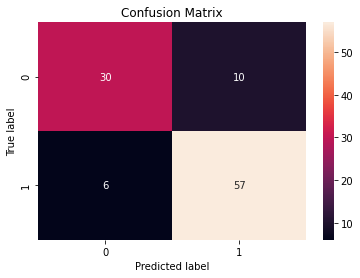

In [326]:
import seaborn as sns
import matplotlib.pyplot as plt
logistic_cm = confusion_matrix(y_test, model1.predict(x_test))
sns.heatmap(logistic_cm, annot=True, fmt='d')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix')
plt.show()

### Train the model with embeddings(questions + answers) as input and grades as output

In [250]:
questions_answers = []
grades = []
for (q,i) in zip(list(QA.keys()), QA.values()):
    temp1 = list(i.keys())
    temp2 = list(i.values())
    for (j,k) in zip(temp1,temp2):
        questions_answers.append(remove_stop_words(str(q)) + " " + remove_stop_words(str(j)))
        grades.append(k)

In [178]:
vectorizer2 = TfidfVectorizer()
answer_vectors2 = vectorizer2.fit_transform(questions_answers)

In [179]:
answer_vectors2

<1280x1627 sparse matrix of type '<class 'numpy.float64'>'
	with 25610 stored elements in Compressed Sparse Row format>

In [180]:
model2 = MLPClassifier(hidden_layer_sizes = (64,32))

In [182]:
model2.fit(answer_vectors2, grades)

MLPClassifier(hidden_layer_sizes=(64, 32))

In [185]:
predictions2 = model2.predict(answer_vectors2)

### Train the model with concat(embeddings(questions), embeddings(answers)) as input and grades as output

In [78]:
model = api.load("glove-wiki-gigaword-100")

In [93]:
def remove_stop_words(sentence):
    words = nltk.word_tokenize(sentence.lower())
    stop_words = set(stopwords.words('english'))
    words = [word for word in words if word not in stop_words]
    processed_sentence = ' '.join(words)
    return processed_sentence

In [95]:
def sentence_to_vec(sentence, embedding_model, num_features):
    words = sentence.split()
    sentence_embedding = np.zeros((num_features,), dtype="float32")
    num_words = 0
    for word in words:
#       if word in embedding_model.key_to_index_dict:
        sentence_embedding = np.add(sentence_embedding, embedding_model[word])
        sentence_embedding
        num_words += 1
    if num_words > 0:
        sentence_embedding = np.divide(sentence_embedding, num_words)
    return sentence_embedding

In [102]:
# sentence = "The quick brown fox jumps over the lazy dog"
# # Convert the sentence to a vector using the pre-trained GloVe model
# vector = sentence_to_vec(remove_stop_words(sentence), model, 100)
# vector

In [103]:
# !pip install gensim

In [104]:
# import numpy as np
# import nlp

# # Load the pre-trained GloVe model
# model = nlp.load('glove-100d')

# # Define a function to convert a sentence to a vector using the pre-trained GloVe model
# def sentence_to_vec(sentence, model, embedding_size):
#     words = sentence.lower().split()
#     # Initialize a vector of zeros
#     sentence_vec = np.zeros((embedding_size,))
#     # Loop over the words in the sentence and add their vectors to the sentence vector
#     for word in words:
#         if word in model.vocab:
#             sentence_vec += model[word]
#     return sentence_vec

# # Example usage
# sentence = "The quick brown fox jumps over the lazy dog"
# vector = sentence_to_vec(sentence, model, 100)
# print(vector)

In [105]:
# !pip install nlp

In [2]:
import torch

# Check CUDA version
print(torch.version.cuda)

# Check if CUDA is available
print(torch.cuda.is_available())

None
False


AssertionError: Torch not compiled with CUDA enabled